# NLP and Text Embeddings

Il existe de nombreuses manières différentes de représenter le texte dans l'apprentissage en profondeur. Bien que nous ayons couvert les représentations de base du sac de mots (BoW), il n'est pas surprenant qu'il existe une manière beaucoup plus sophistiquée de représenter les données textuelles appelées intégrations. Alors qu'un vecteur BoW agit uniquement comme un compte de mots dans une phrase, les plongements aident à définir numériquement le sens réel de certains mots.

Dans ce guide, nous allons explorer les plongements de texte et apprendre à créer des plongements à l'aide d'un modèle BoW continu. Nous passerons ensuite à la discussion des n-grammes et de la façon dont ils peuvent être utilisés dans les modèles. Nous couvrirons également diverses manières dont le marquage, le découpage et la tokenisation peuvent être utilisés pour diviser le NLP en ses différentes parties constitutives. Enfin, nous examinerons les modèles de langage TF-IDF et comment ils peuvent être utiles pour pondérer nos modèles par rapport aux mots peu fréquents.

Les sujets suivants seront abordés:

* Word embeddings

* Exploration de CBOW
* Exploration des n-grammes
* Tokenisation
* Tagging and chunking for parts of speech
*  TF-IDF

## Embeddings for NLP
Les mots n'ont pas une manière naturelle de représenter leur sens. Dans les images, nous avons déjà des représentations dans des vecteurs riches (contenant les valeurs de chaque pixel dans l'image), il serait donc clairement avantageux d'avoir une représentation vectorielle des mots aussi riche. Lorsque des parties du langage sont représentées dans un format vectoriel de grande dimension, elles sont appelées intégrations. En analysant grossièrement un corpus de mots, et en déterminant quels mots apparaissent fréquemment ensemble, nous pouvons obtenir un vecteur de longueur n pour chaque mot, qui représente mieux la relation sémantique de chaque mot avec tous les autres mots. Nous avons vu précédemment que nous pouvons facilement représenter des mots comme des vecteurs codés à chaud

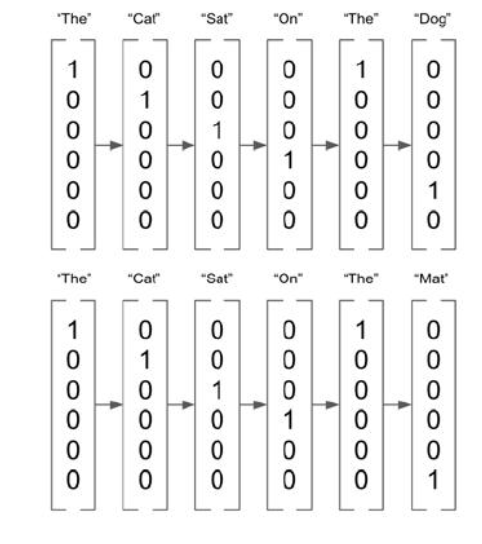

D'autre part, les plongements sont des vecteurs de longueur n (dans l'exemple suivant, n = 3) qui peuvent prendre n'importe quelle valeur

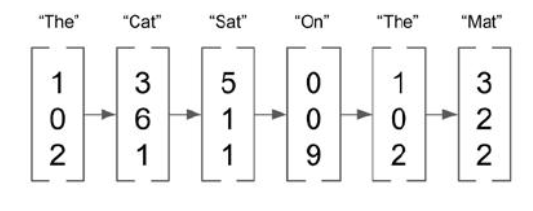

Ces plongements représentent le vecteur du mot dans un espace à n dimensions (où n est la longueur des vecteurs plongeants), et les mots ayant des vecteurs similaires dans cet espace sont considérés comme ayant une signification plus similaire. Bien que ces inclusions puissent être de n'importe quelle taille, elles sont généralement d'une dimensionnalité beaucoup plus faible que la représentation BoW. La représentation BOW nécessite des vecteurs qui sont de la longueur du corpus entier, ce qui, lorsqu'on regarde une langue entière, peut devenir très volumineux très rapidement. Bien que les plongements soient d'une dimensionnalité suffisamment élevée pour représenter les mots individuels, ils ne sont généralement pas beaucoup plus grands que quelques centaines de dimensions. De plus, les vecteurs BOW sont généralement très clairsemés, composés principalement de zéros, alors que les plongements sont riches en données et que chaque dimension contribue à la représentation globale du mot. La dimensionnalité plus faible et le fait qu'ils ne soient pas rares rendent l'apprentissage en profondeur sur les plongements beaucoup plus eficace que l'exécution sur les représentations BOW.

## GLoVe

Nous pouvons télécharger un ensemble de word embeddings pré-calculées pour démontrer leur fonctionnement. Pour cela, nous utiliserons les intégrations Global Vectors for Word Representation (GLoVe), qui peuvent être téléchargées à partir d'ici : https://nlp.stanford.edu/projects/glove/ . Ces plongements sont calculés sur un très grand corpus de données NLP et sont entraînés sur une matrice de cooccurrence de mots. Ceci est basé sur l'idée que les mots qui apparaissent ensemble sont plus susceptibles d'avoir une signification similaire. Par exemple, le mot soleil est susceptible d'apparaître plus fréquemment avec le mot chaud par opposition au mot froid, il est donc plus probable que soleil et chaud soient considérés comme plus similaires.

## Explorer CBOW

Le modèle de sac de mots continu (CBOW) fait partie de Word2Vec – un modèle créé par Google afin d'obtenir des représentations vectorielles de mots. En exécutant ces modèles sur un très grand corpus, nous sommes en mesure d'obtenir des représentations détaillées des mots qui représentent leur similarité sémantique et contextuelle les uns avec les autres. Le modèle Word2Vec se compose de deux composants principaux :
*  CBOW : ce modèle tente de prédire le mot cible dans un document, étant donné les mots environnants.
*  Skip-gram : is est l'opposé de CBOW ; ce modèle tente de prédire les mots environnants, étant donné le mot cible


Étant donné que ces modèles effectuent des tâches similaires, nous nous concentrerons sur un seul pour l'instant, en particulier CBOW. Ce modèle vise à prédire un mot (le mot cible), étant donné les autres mots qui l'entourent (appelés mots de contexte). Une façon de comptabiliser les mots de contexte pourrait être aussi simple que d'utiliser le mot directement avant le mot cible dans la phrase pour prédire le mot cible, alors que des modèles plus complexes pourraient utiliser plusieurs mots avant et après le mot cible. Considérez la phrase suivante:

PyTorch is a deep learning framework. 

Disons que nous voulons prédire le mot deep, étant donné les mots de contexte :

PyTorch is a {target_word} learning framework
 
 Nous pourrions voir cela de plusieurs manières :

 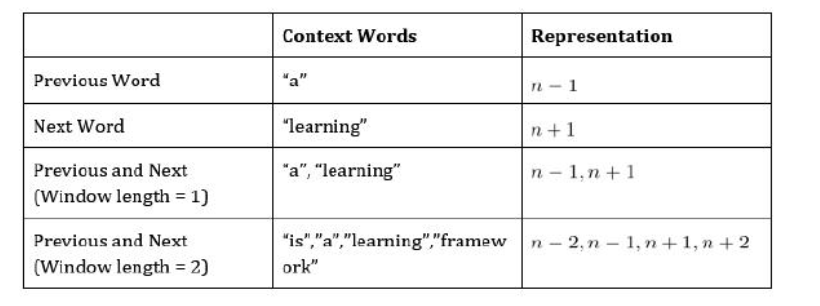

Pour notre modèle CBOW, nous utiliserons une fenêtre de longueur 2, ce qui signifie que pour les paires entrée/sortie (X, y) de notre modèle, nous utiliserons ([n-2, n-1, n+1, n+2, n ]), où n est notre mot cible prédit.

En les utilisant comme entrées de modèle, nous allons former un modèle qui inclut une couche d'intégration. Cette couche embadding forme automatiquement une représentation à n dimensions des mots de notre corpus. Cependant, pour commencer, cette couche est initialisée avec des poids aléatoires. Ces paramètres sont ce qui sera appris à l'aide de notre modèle de sorte qu'après que notre modèle ait terminé l'apprentissage, cette couche d'embadding peut être utilisée pour encoder notre corpus dans une représentation vectorielle intégrée

## Architecture CBOW

Nous allons maintenant concevoir l'architecture de notre modèle afin d'apprendre nos plongements. Ici, notre modèle prend une entrée de quatre mots (deux avant notre mot cible et deux après) et l'entraîne par rapport à une sortie (notre mot cible). La représentation suivante est une illustration de ce à quoi cela pourrait ressembler :

 <img src='https://upload.wikimedia.org/wikipedia/commons/d/dd/CBOW_eta_Skipgram.png' width=500px>


 Nos mots d'entrée sont d'abord alimentés à travers une couche de plongement, représentée comme un tenseur de taille (n,l), où n est la longueur spéciée de nos plongements et l est le nombre de mots dans notre corpus. C'est parce que chaque mot du corpus a sa propre représentation tensorielle unique.

 En utilisant nos embadding combinées (sommes) de nos quatre mots de contexte, cela est ensuite introduit dans une couche entièrement connectée afin d'apprendre la classification finale de notre mot cible par rapport à notre représentation intégrée de nos mots de contexte. Notez que notre mot prédit/cible est codé comme un vecteur qui correspond à la longueur de notre corpus. Cela est dû au fait que notre modèle prédit eficacement la probabilité que chaque mot du corpus soit le mot cible, et la classification finale est celle avec la probabilité la plus élevée. Nous obtenons ensuite une perte, la rétropropageons via notre réseau et mettons à jour les paramètres sur la couche entièrement connectée, ainsi que les intégrations elles-mêmes.

 La raison pour laquelle cette méthodologie fonctionne est que nos plongements appris représentent une similitude sémantique. Disons que nous entraînons notre modèle sur les éléments suivants:

 X = ["is", "a", "learning", "framework"]; y = "deep"

 
Ce que notre modèle apprend essentiellement, c'est que la représentation d'intégration combinée de nos mots cibles est sémantiquement similaire à notre mot cible. Si nous répétons cela sur un corpus de mots suffisamment grand, nous constaterons que nos incorporations de mots commencent à ressembler à nos incorporations GLoVe précédemment vues, où des mots sémantiquement similaires apparaissent les uns aux autres dans l'espace d'incorporation





## Building CBOW

Nous allons maintenant passer en revue la construction d'un modèle CBOW à partir de zéro, démontrant ainsi comment nos vecteurs d'intégration peuvent être appris:

1. Nous définissons d'abord du texte et effectuons un nettoyage de base du texte, en supprimant la ponctuation de base et en le convertissant en minuscules :


    text = text.replace(',','').replace('.','').lower()
    .                             split()


In [1]:
import torch
import torch.nn as nn
import numpy as np

text = """How that personage haunted my dreams, I need scarcely tell you. On
stormy nights, when the wind shook the four corners of the house and
the surf roared along the cove and up the cliffs, I would see him in a
thousand forms, and with a thousand diabolical expressions. Now the leg
would be cut off at the knee, now at the hip, now he was a monstrous
kind of a creature who had never had but the one leg, and that in the
middle of his body. To see him leap and run and pursue me over hedge and
ditch was the worst of nightmares. And altogether I paid pretty dear for
my monthly fourpenny piece, in the shape of these abominable fancies"""

text = text.replace(',','').replace('.','').lower().split()

2. On commence par définir notre corpus et sa longueur :


    corpus = set(text)
    corpus_length = len(corpus)

3. Notez que nous utilisons un ensemble au lieu d'une liste car nous ne sommes concernés que par les mots uniques dans notre texte. Nous construisons ensuite notre index de corpus et notre index de corpus inverse. Notre index de corpus va nous permettre d'obtenir l'index d'un mot étant donné le mot lui-même, ce qui nous sera utile lors de l'encodage de nos mots pour l'entrée dans notre réseau. Notre index de corpus inverse nous permet d'obtenir un mot, étant donné la valeur de l'index, qui sera utilisé pour reconvertir nos prédictions en mots 


4. Ensuite, nous encodons nos données. Nous parcourons notre corpus et pour chaque mot cible, nous capturons les mots de contexte (les deux mots avant et les deux mots après). Nous l'ajoutons avec le mot cible lui-même à notre ensemble de données. Notez comment nous commençons ce processus à partir du troisième mot de notre corpus (index = 2) et l'arrêtons deux étapes avant la fin du corpus. C'est parce que les deux mots du début n'auront pas deux mots avant eux et, de même, les deux mots de la fin n'auront pas deux mots après eux

In [4]:
corpus = set(text)
corpus_length = len(corpus)

word_dict = {}
inverse_word_dict = {}

for i, word in enumerate(corpus):
    word_dict[word] = i
    inverse_word_dict[i] = word

data = []

for i in range(2, len(text) - 2):
    sentence = [text[i-2], text[i-1],
               text[i+1], text[i+2]]
    target = text[i]
    data.append((sentence, target))
    
data

[(['how', 'that', 'haunted', 'my'], 'personage'),
 (['that', 'personage', 'my', 'dreams'], 'haunted'),
 (['personage', 'haunted', 'dreams', 'i'], 'my'),
 (['haunted', 'my', 'i', 'need'], 'dreams'),
 (['my', 'dreams', 'need', 'scarcely'], 'i'),
 (['dreams', 'i', 'scarcely', 'tell'], 'need'),
 (['i', 'need', 'tell', 'you'], 'scarcely'),
 (['need', 'scarcely', 'you', 'on'], 'tell'),
 (['scarcely', 'tell', 'on', 'stormy'], 'you'),
 (['tell', 'you', 'stormy', 'nights'], 'on'),
 (['you', 'on', 'nights', 'when'], 'stormy'),
 (['on', 'stormy', 'when', 'the'], 'nights'),
 (['stormy', 'nights', 'the', 'wind'], 'when'),
 (['nights', 'when', 'wind', 'shook'], 'the'),
 (['when', 'the', 'shook', 'the'], 'wind'),
 (['the', 'wind', 'the', 'four'], 'shook'),
 (['wind', 'shook', 'four', 'corners'], 'the'),
 (['shook', 'the', 'corners', 'of'], 'four'),
 (['the', 'four', 'of', 'the'], 'corners'),
 (['four', 'corners', 'the', 'house'], 'of'),
 (['corners', 'of', 'house', 'and'], 'the'),
 (['of', 'the', 'an

5. Nous définissons ensuite la longueur de nos plongements. Bien que cela puisse techniquement être n'importe quel nombre que vous souhaitez, il y a quelques compromis à considérer. Alors que les plongements de haute dimension peuvent conduire à une représentation plus détaillée des mots, l'espace des caractéristiques devient également plus clairsemé, ce qui signifie que les plongements de haute dimension ne sont appropriés que pour les grands corpus. De plus, des intégrations plus grandes signifient plus de paramètres à apprendre, donc augmenter la taille d'intégration peut augmenter considérablement le temps de formation. Nous ne nous entraînons que sur un très petit jeu de données, nous avons donc choisi d'utiliser des plongements de taille 20 :

In [7]:
embedding_length = 20

Ensuite, nous définissons notre modèle CBOW dans PyTorch. Nous définissons notre couche d'incorporations de manière à ce qu'elle prenne un vecteur de longueur de corpus et génère une seule incorporation. Nous définissons notre couche linéaire comme une couche entièrement connectée qui prend une intégration et génère un vecteur de 64. Nous définissons notre couche finale comme une couche de classification de la même longueur que notre corpus de texte.

6. Nous définissons notre passe avant en obtenant et en additionnant les plongements pour tous les mots de contexte d'entrée. celui-ci passe ensuite à travers la couche entièrement connectée avec les fonctions d'activation ReLU et enfin dans la couche de classification, qui prédit quel mot du corpus correspond le plus aux plongements sommés des mots de contexte :

In [5]:
class CBoW(torch.nn.Module):

    def __init__(self, corpus_length, embedding_dim):
        super(CBoW, self).__init__()
        
        self.embeddings = nn.Embedding(corpus_length, embedding_dim)

        self.linear1 = nn.Linear(embedding_dim, 64)
        self.linear2 = nn.Linear(64, corpus_length)
        
        self.activation_function1 = nn.ReLU()
        self.activation_function2 = nn.LogSoftmax(dim = -1)

    def forward(self, inputs):
        embeds = sum(self.embeddings(inputs)).view(1,-1)
        out = self.linear1(embeds)
        out = self.activation_function1(out)
        out = self.linear2(out)
        out = self.activation_function2(out)
        return out

    def get_word_emdedding(self, word):
        word = torch.LongTensor([word_dict[word]])
        return self.embeddings(word).view(1,-1)

7. On peut aussi définir une fonction get_word_embedding(), qui va nous permettre d'extraire les plongements pour un mot donné après entraînement de notre modèle :



In [5]:
def get_word_emdedding(self, word):
  word = torch.LongTensor([word_dict[word]])
  return self.embeddings(word).view(1,-1)

8. Maintenant, nous sommes prêts à entraîner notre modèle. Nous créons d'abord une instance de notre modèle et définissons la fonction de perte et l'optimiseur :

In [8]:
model = CBoW(corpus_length, embedding_length)

loss_function = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

9. Nous créons ensuite une fonction d'assistance qui prend nos mots de contexte d'entrée, obtient les index de mots pour chacun d'entre eux et les transforme en un tenseur de longueur 4, qui forme l'entrée de notre réseau de neurones :

In [9]:
def make_sentence_vector(sentence, word_dict):
    idxs = [word_dict[w] for w in sentence]
    return torch.tensor(idxs, dtype=torch.long)

print(make_sentence_vector(['stormy','nights','when','the'], word_dict))

tensor([16, 32, 49,  3])



10. Maintenant, nous formons notre réseau. Nous parcourons 100 époques et pour chaque passage, nous parcourons tous nos mots de contexte, c'est-à-dire les paires de mots cibles. Pour chacune de ces paires, nous chargeons la phrase contextuelle à l'aide de make_sentence_vector() et utilisons l'état actuel de notre modèle pour obtenir des prédictions. Nous évaluons ces prédictions par rapport à notre objectif réel afin d'obtenir notre perte. Nous effectuons une rétropropagation pour calculer les gradients et passons en revue notre optimiseur pour mettre à jour les poids. Enfin, nous additionnons toutes nos pertes pour l'époque et l'imprimons. Ici, nous pouvons voir que notre perte diminue, montrant que notre modèle apprend :

In [10]:
for epoch in range(100):
    epoch_loss = 0
    for sentence, target in data:
        model.zero_grad()
        sentence_vector = make_sentence_vector(sentence, word_dict)  
        log_probs = model(sentence_vector)
        loss = loss_function(log_probs, torch.tensor([word_dict[target]], dtype=torch.long))
        loss.backward()
        optimizer.step()
        epoch_loss += loss.data
    print('Epoch: '+str(epoch)+', Loss: ' + str(epoch_loss.item()))

Epoch: 0, Loss: 544.1271362304688
Epoch: 1, Loss: 477.2994384765625
Epoch: 2, Loss: 430.30023193359375
Epoch: 3, Loss: 388.8070068359375
Epoch: 4, Loss: 349.28070068359375
Epoch: 5, Loss: 310.3629150390625
Epoch: 6, Loss: 271.95013427734375
Epoch: 7, Loss: 234.6924591064453
Epoch: 8, Loss: 199.35916137695312
Epoch: 9, Loss: 166.7037353515625
Epoch: 10, Loss: 137.4654998779297
Epoch: 11, Loss: 112.23402404785156
Epoch: 12, Loss: 90.87699127197266
Epoch: 13, Loss: 73.29149627685547
Epoch: 14, Loss: 59.16935348510742
Epoch: 15, Loss: 48.04399108886719
Epoch: 16, Loss: 39.26024627685547
Epoch: 17, Loss: 32.458194732666016
Epoch: 18, Loss: 27.21579360961914
Epoch: 19, Loss: 23.1124267578125
Epoch: 20, Loss: 19.96011734008789
Epoch: 21, Loss: 17.453174591064453
Epoch: 22, Loss: 15.439974784851074
Epoch: 23, Loss: 13.799379348754883
Epoch: 24, Loss: 12.458897590637207
Epoch: 25, Loss: 11.31821346282959
Epoch: 26, Loss: 10.362946510314941
Epoch: 27, Loss: 9.543011665344238
Epoch: 28, Loss: 8.8

Maintenant que notre modèle a été entraîné, nous pouvons faire des prédictions. Nous définissons quelques fonctions pour nous permettre de le faire. get_predicted_result() renvoie le mot prédit à partir du tableau des prédictions, tandis que notre fonction predict_sentence() fait une prédiction basée sur les mots de contexte


11. Nous divisons nos phrases en mots individuels et les transformons en un vecteur d'entrée. Nous créons ensuite notre tableau de prédiction en l'alimentant dans notre modèle et obtenons notre mot prédit final en utilisant la fonction get_predicted_result(). Nous imprimons également les deux mots avant et après le mot cible prédit pour le contexte. Nous pouvons exécuter quelques prédictions pour valider que notre modèle fonctionne correctement :

In [11]:
def get_predicted_result(input, inverse_word_dict):
    index = np.argmax(input)
    return inverse_word_dict[index]

def predict_sentence(sentence):
    sentence_split = sentence.replace('.','').lower().split()
    sentence_vector = make_sentence_vector(sentence_split, word_dict)
    prediction_array = model(sentence_vector).data.numpy()
    print('Preceding Words: {}\n'.format(sentence_split[:2]))
    print('Predicted Word: {}\n'.format(get_predicted_result(prediction_array[0], inverse_word_dict)))
    print('Following Words: {}\n'.format(sentence_split[2:]))

predict_sentence('to see leap and')

Preceding Words: ['to', 'see']

Predicted Word: him

Following Words: ['leap', 'and']



10. Maintenant que nous avons un modèle entraîné, nous sommes en mesure d'utiliser la fonction get_word_embedding() afin de renvoyer l'imbrication de mots à 20 dimensions pour n'importe quel mot de notre corpus. Si nous avions besoin de nos plongements pour une autre tâche NLP, nous pourrions en fait extraire les poids de l'ensemble de la couche de plongement et les utiliser dans notre nouveau modèle

In [12]:

print(model.get_word_emdedding('leap'))

tensor([[ 1.1810, -1.4380,  1.2544, -0.3847, -0.6498, -0.9453, -1.5100, -0.5830,
          1.2150,  1.5325, -1.0141,  0.8626, -2.2146, -0.5478,  1.4913, -0.2603,
         -0.2384,  0.3097,  0.2475,  0.5694]], grad_fn=<ViewBackward>)


Ici, nous avons montré comment former un modèle CBOW pour créer des intégrations de mots. En réalité, pour créer des plongements fiables pour un corpus, nous aurions besoin d'un très grand ensemble de données pour pouvoir vraiment capturer la relation sémantique entre tous les mots. De ce fait, il peut être préférable d'utiliser des embeddings pré-entraînés tels que GLoVe, qui ont été entraînés sur un très grand corpus de données, pour vos modèles, mais il peut y avoir des cas où il serait préférable d'entraîner un tout nouvel ensemble d'encastrements à partir de zéro ; par exemple, lors de l'analyse d'un corpus de données qui ne ressemble pas à la PNL normale (par exemple, les données Twitter où les utilisateurs peuvent parler en abréviations courtes et ne pas utiliser de phrases complètes)